<a href="https://colab.research.google.com/github/PhamBaVuong/MachineLearning/blob/main/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree

01

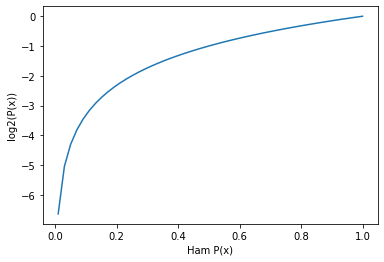

In [1]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.linspace(0.01, 1), np.log2(np.linspace(0.01,1)))
ax.set_xlabel('Ham P(x)')
ax.set_ylabel('log2(P(x))')
plt.show()

02

In [2]:
import numpy as np
def gini_index(groups, classes):
    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        gini += (1.0 - score) * (size / n_instances)
    return gini

print (gini_index([[[1, 1], [1, 0]], [[1, 1], [1, 0]]], [0, 1]))
print (gini_index([[[1, 0], [1, 0]], [[1, 1], [1, 1]]], [0, 1]))

0.5
0.0


03

In [3]:
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

def gini_index(groups, classes):
    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        gini += (1.0 - score) * (size / n_instances)
    return gini

def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0]) - 1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            print ('X%d < %.3f Gini = %.3f' % ((index + 1), row[index], gini))
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index': b_index, 'value': b_value, 'groups': b_groups}

dataset =  [[2.771244718,1.784783929,0],
[1.728571309,1.169761413,0],
[3.678319846,2.81281357,0],
[3.961043357,2.61995032,0],
[2.999208922,2.209014212,0],
[7.497545867,3.162953546,1],
[9.00220326,3.339047188,1],
[7.444542326,0.476683375,1],
[10.12493903,3.234550982,1],
[6.642287351,3.319983761,1]]

split = get_split(dataset)

X1 < 2.771 Gini = 0.444
X1 < 1.729 Gini = 0.500
X1 < 3.678 Gini = 0.286
X1 < 3.961 Gini = 0.167
X1 < 2.999 Gini = 0.375
X1 < 7.498 Gini = 0.286
X1 < 9.002 Gini = 0.375
X1 < 7.445 Gini = 0.167
X1 < 10.125 Gini = 0.444
X1 < 6.642 Gini = 0.000
X2 < 1.785 Gini = 0.500
X2 < 1.170 Gini = 0.444
X2 < 2.813 Gini = 0.320
X2 < 2.620 Gini = 0.417
X2 < 2.209 Gini = 0.476
X2 < 3.163 Gini = 0.167
X2 < 3.339 Gini = 0.444
X2 < 0.477 Gini = 0.500
X2 < 3.235 Gini = 0.286
X2 < 3.320 Gini = 0.375


04

In [4]:
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

dataset = [[2.771244718,1.784783929,0],
[1.728571309,1.169761413,0],
[3.678319846,2.81281357,0],
[3.961043357,2.61995032,0],
[2.999208922,2.209014212,0],
[7.497545867,3.162953546,1],
[9.00220326,3.339047188,1],
[7.444542326,0.476683375,1],
[10.12493903,3.234550982,1],
[6.642287351,3.319983761,1]]

stump = {'index': 0, 'right': 1, 'value': 6.642287351, 'left': 0}
for row in dataset:
    prediction = predict(stump, row)
    print ('Expected = %d, Got = %d' % (row[-1], prediction))

Expected = 0, Got = 0
Expected = 0, Got = 0
Expected = 0, Got = 0
Expected = 0, Got = 0
Expected = 0, Got = 0
Expected = 1, Got = 1
Expected = 1, Got = 1
Expected = 1, Got = 1
Expected = 1, Got = 1
Expected = 1, Got = 1


05

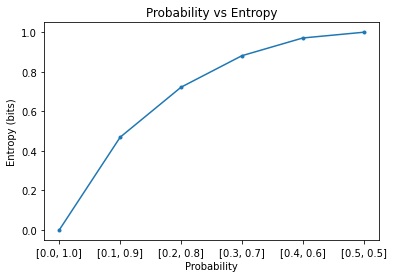

In [5]:
from math import log2
from matplotlib import pyplot

def entropy(ents, ets = 1e-15):
    return -sum([p * log2(p + ets) for p in ents])

probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
dists = [[p, 1.0 -p] for p in probs]
ents = [entropy(d) for d in dists]
pyplot.plot(probs, ents, marker = '.')
pyplot.title('Probability vs Entropy')
pyplot.xticks(probs, [str(d) for d in dists])
pyplot.xlabel('Probability')
pyplot.ylabel('Entropy (bits)')
pyplot.show()

06

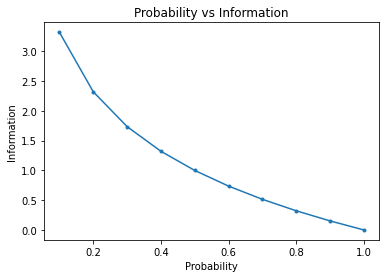

In [6]:
from math import log2
from matplotlib import pyplot
probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
info = [-log2(p) for p in probs]
pyplot.plot(probs, info, marker = '.')
pyplot.title('Probability vs Information')
pyplot.xlabel('Probability')
pyplot.ylabel('Information')
pyplot.show()

07

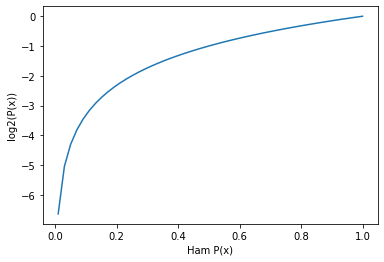

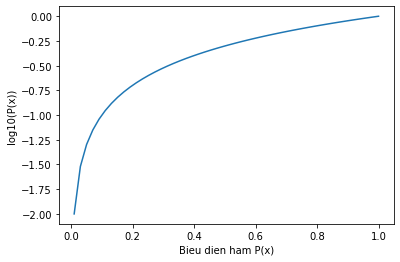

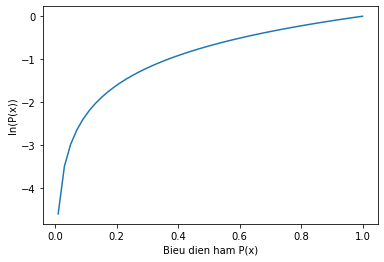

In [7]:
# Đường cong log2 (P(x))
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.linspace(0.01, 1), np.log2(np.linspace(0.01,1)))
ax.set_xlabel('Ham P(x)')
ax.set_ylabel('log2(P(x))')
plt.show()

# Đường cong log10 (P(x))
# import numpy as np
# import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.linspace(0.01, 1), np.log10(np.linspace(0.01,1)))
ax.set_xlabel('Bieu dien ham P(x)')
ax.set_ylabel('log10(P(x))')
plt.show()

# Đường con ln (P(x))
# import numpy as np
# import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.linspace(0.01, 1), np.log(np.linspace(0.01,1)))
ax.set_xlabel('Bieu dien ham P(x)')
ax.set_ylabel('ln(P(x))')
plt.show()

08

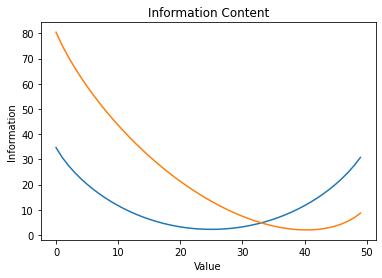

In [8]:
from sklearn import datasets, tree
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
x = np.arange(50)
plt.plot(x, -np.log(stats.binom.pmf(x, 50, 0.5)), label = 'Binom(50, 0.5)')
plt.title('Information Content')
plt.xlabel('Value')
plt.ylabel('Information')
plt.plot(x, -np.log(stats.binom.pmf(x, 50, 0.8)), label = 'Binom(50, 0.8)')
plt.show()